In [1]:
library(tseries)
library(forecast)
library(ggplot2)

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: timeDate
This is forecast 7.3 



# Arrivals

In [2]:
df <- read.csv("../data/sample/333_arrivals.csv", header = FALSE)
df$V1 <- as.Date(df$V1, "%Y-%m-%d")
head(df)

V1,V2
2013-09-27,2
2013-09-28,21
2013-09-29,13
2013-09-30,5
2013-10-01,7
2013-10-02,19


## Raw Plot

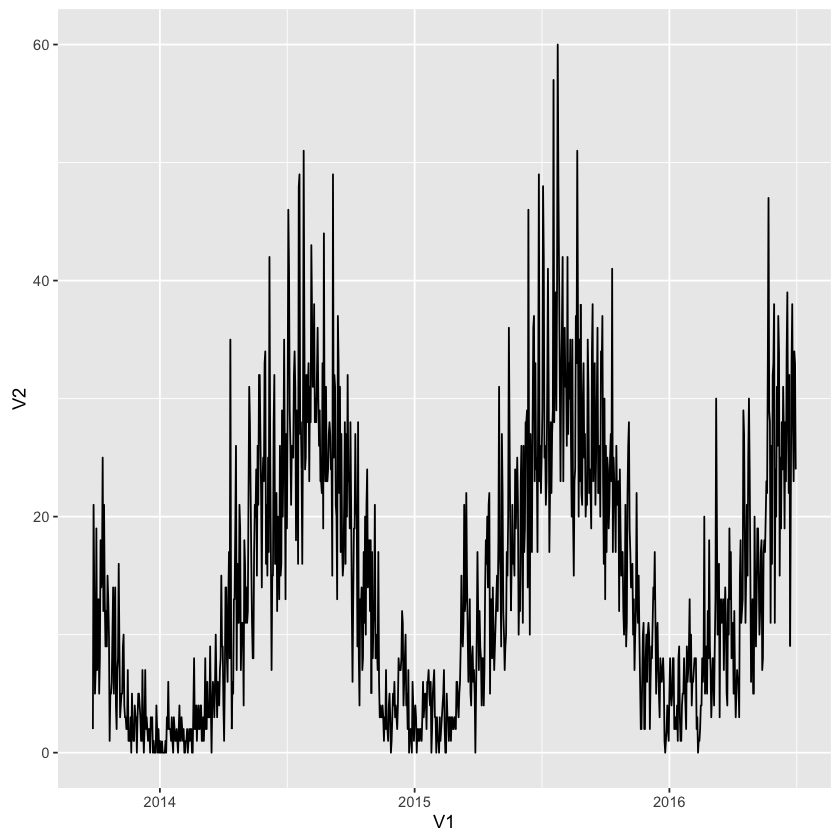

In [3]:
ggplot( data = df, aes( V1, V2 )) + geom_line() 

## TS Plot

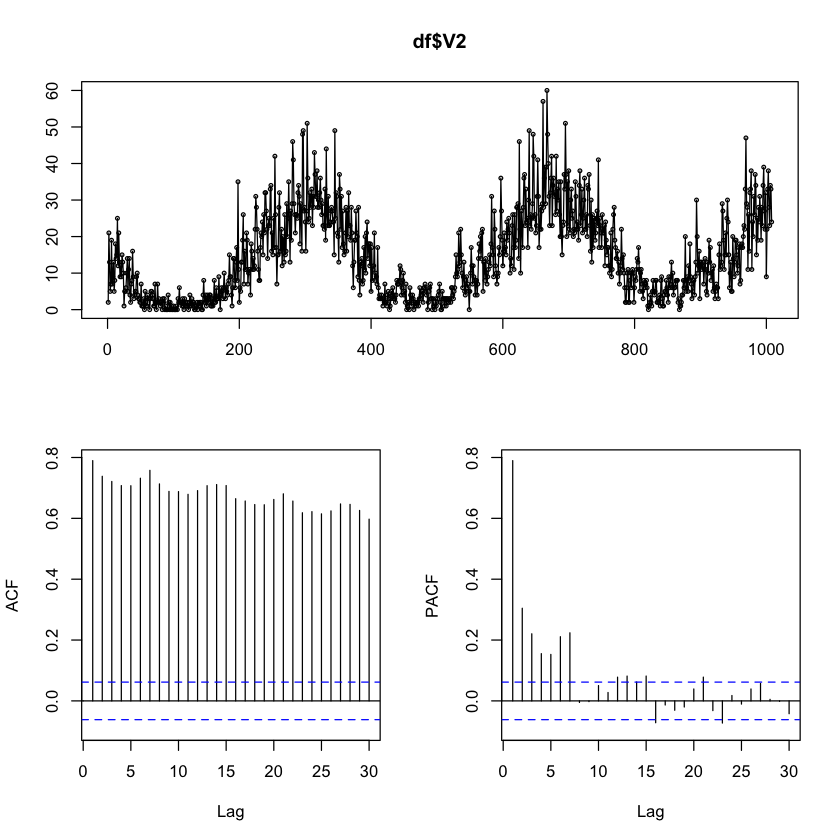

In [4]:
tsdisplay(df$V2)

## Power Spectral Density

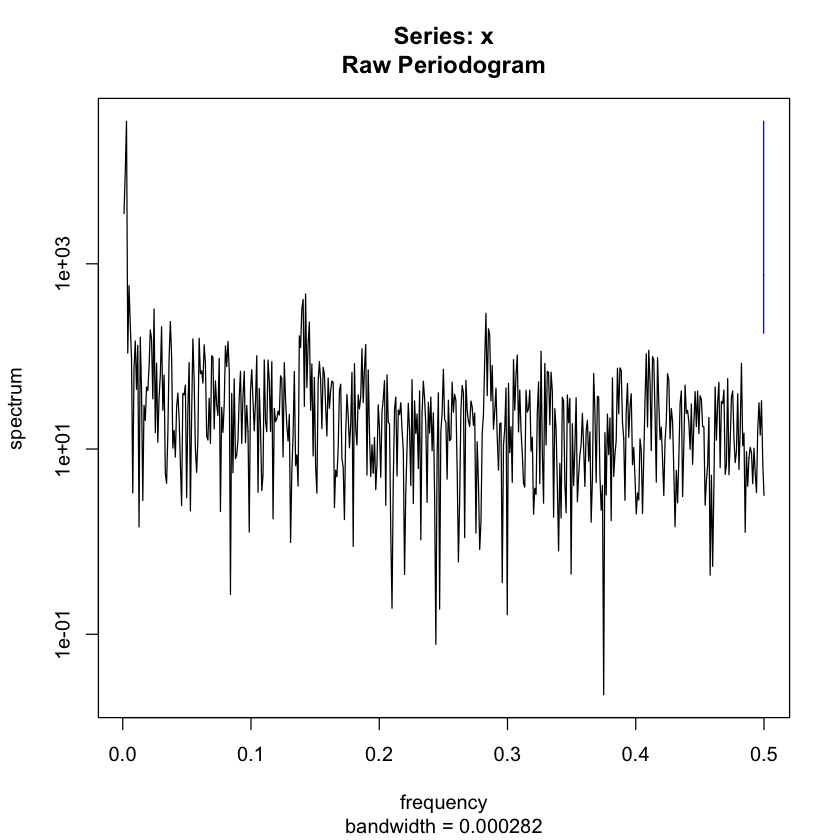

In [5]:
spectrum(df$V2)

# Departures

In [7]:
df <- read.csv("../data/sample/333_departures.csv", header = FALSE)
df$V1 <- as.Date(df$V1, "%Y-%m-%d")
head(df)

V1,V2
2013-09-27,3
2013-09-28,18
2013-09-29,6
2013-09-30,6
2013-10-01,9
2013-10-02,18


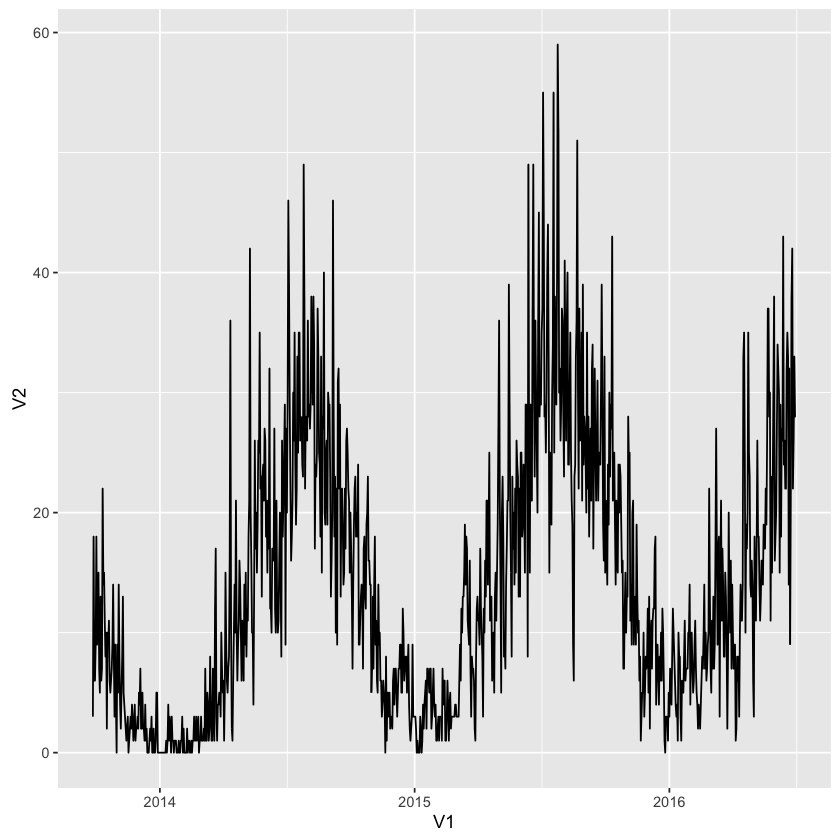

In [8]:
ggplot( data = df, aes( V1, V2 )) + geom_line() 

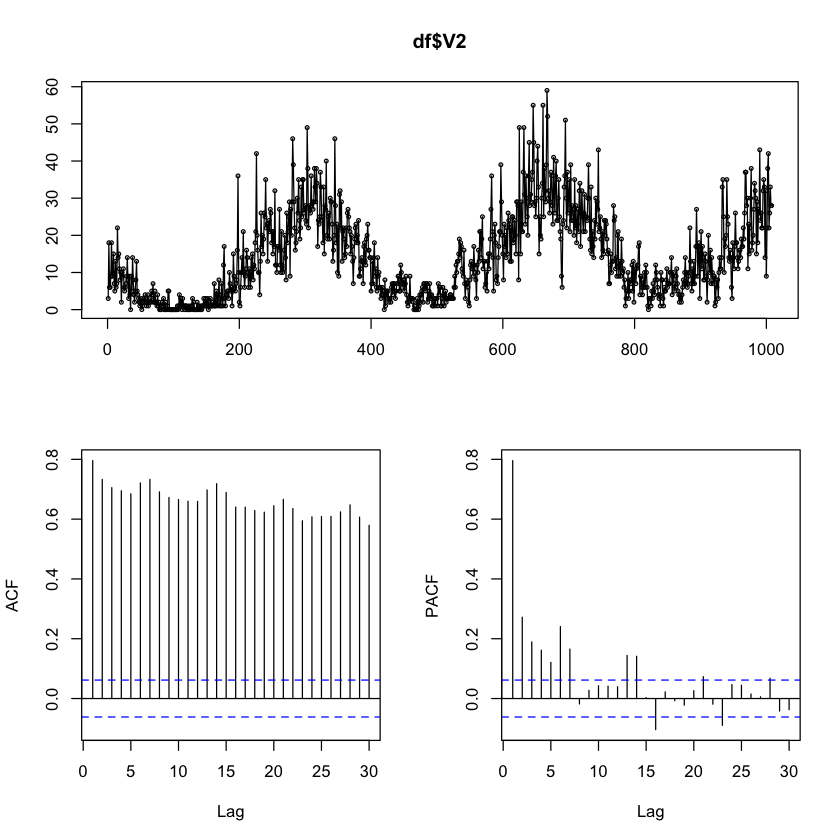

In [9]:
tsdisplay(df$V2)

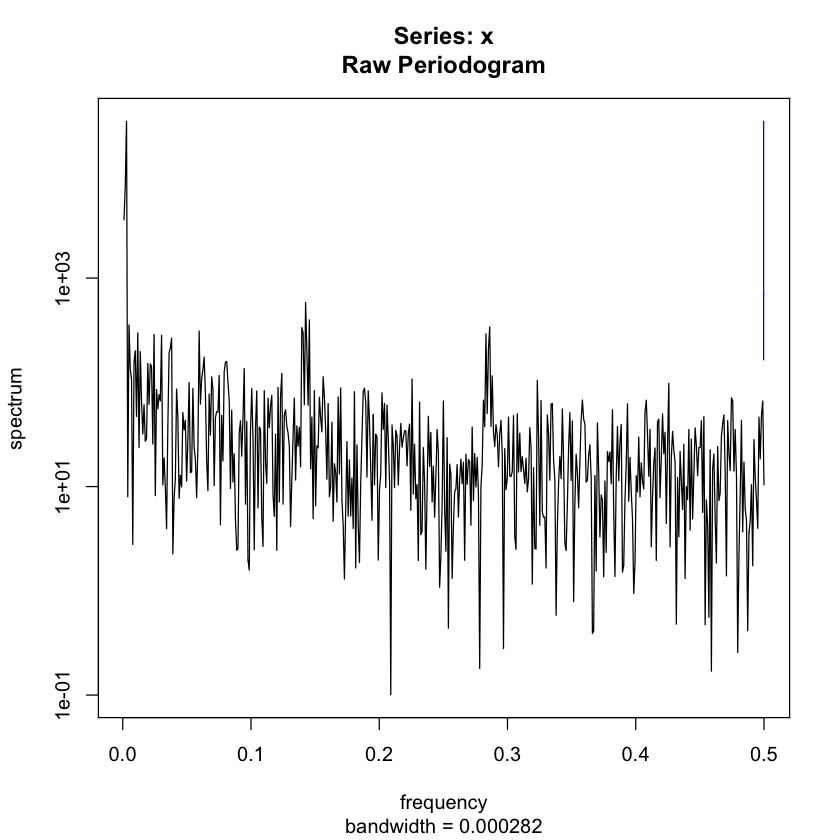

In [10]:
spectrum(df$V2)